In [1]:
import uproot, awkward
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, LogNorm
import numpy as np
import pandas as pd

In [2]:
file = uproot.open("cal04.root")

In [3]:
tree = file['calibration4']

Define a nice cmp for any 2D hists we want later:

In [4]:
Greys = cm.get_cmap('Greys', 256)
newcolors = Greys(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 0])
black = np.array([0, 0, 0, 1])
newcolors[:1, :] = white
newcolors[1:, :] = black
newcmpBlack = ListedColormap(newcolors)

In the next cell, take the tree and put all the branches into a data frame, correctly labeled by strip number.

In [5]:
brancharr = []
detnames = ["U1", "D1", "R1", "L1", "U2", "D2", "R2", "L2"]
df = pd.DataFrame()

chanlast = 0
for adcnum in range(6):
    adcnum = adcnum + 8
    #print("adc: " + str(adcnum))
    if adcnum < 10:
        endname = "_adc0"
    else:
        endname = "_adc"
    if adcnum < 13:
        for chnum in range(32):
            chan = chnum + 1 + chanlast
            if chan < 10:
                startname = "b00"
            elif chan < 100:
                startname = "b0"
            else:
                startname = "b"
            branchname = startname + str(chan) + endname + str(adcnum)
            
            brancharr.append(branchname)
    if adcnum == 13:
        for chan in range(2):
            chan = chan + 1 + chanlast
            branchname = "b" + str(chan) + "_adc" + str(adcnum)
            brancharr.append(branchname)
    chanlast = chan

#print(brancharr)
for i in range(len(brancharr)):
    branch = brancharr[i]
    if i < 32:
        if i < 16:
            df["U1_" + str(i) + "_O"] = tree.array(branch)
        if i > 15:
            df["U1_" + str(i-16) + "_I"] = tree.array(branch)
    elif 31 < i < 64:
        if i-32 < 16:
            df["D1_" + str(i-32) + "_O"] = tree.array(branch)
        if i-32 > 15:
            df["D1_" + str(i-32-16) + "_I"] = tree.array(branch)
    elif 63 < i < 96:
        if i-64 < 16:
            df["R1_" + str(i-64) + "_O"] = tree.array(branch)
        if i-64 > 15:
            df["R1_" + str(i-64-16) + "_I"] = tree.array(branch)
    elif 95 < i < 128:
        if i-96 < 16:
            df["L1_" + str(i-96) + "_O"] = tree.array(branch)
        if i-96 > 15:
            df["L1_" + str(i-96-16) + "_I"] = tree.array(branch)
    elif 127 < i < 144:
        df["U2_" + str(i-128)] = tree.array(branch)
    elif 143 < i < 160:
        df["D2_" + str(i-144)] = tree.array(branch)
    elif i == 160:
        df["R2_0"] = tree.array(branch)
    elif i == 161:
        df["L2_0"] = tree.array(branch)

(array([[71.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.898e+03, 1.899e+03,
        1.900e+03]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.898e+03, 1.899e+03,
        1.900e+03]),
 <matplotlib.collections.QuadMesh at 0x7f2bf4c37af0>)

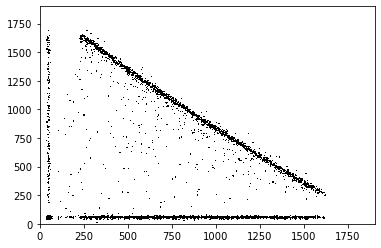

In [6]:
fig, axs = plt.subplots()
axs.hist2d(df["U1_0_I"]*.95861, df["U1_0_O"], cmap=newcmpBlack, bins=(1900,1900), range=[[0,1900],[0,1900]])

(array([  125.,   198.,   136.,   634.,   997.,  1340.,  2072.,  2307.,
         2220.,  2288.,  1469.,  2055.,  1150.,  1320.,  1352.,  2258.,
         1653.,  1822.,  2949.,  1550.,  1863.,  2072.,  2115.,  2343.,
         1728.,  1526.,  3058.,  2337.,  1740.,  1540.,  2104.,  1674.,
         2304.,  1468.,  1621.,  1631.,  2047.,  1490.,  1442.,   890.,
         1596.,  1572.,  1836.,  1515.,  1536.,  2123.,  1304.,  1870.,
         1318.,   904.,  1267.,  1430.,  1854.,   952.,  1964.,   865.,
         2053.,  1046.,  1209.,  2066.,  1339.,  1209.,   854.,   859.,
          458.,   595.,   590.,   405.,   878.,  1846., 11758., 17069.,
         8816.,  2761.,   152.,    73.,   192.,    44.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([ 200.,  223.,  246.,  269.,  292.,  315.,  338.,  361.,  384.,
         407.,  430.,  

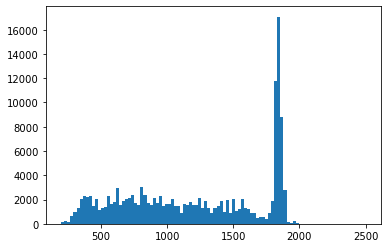

In [7]:
plt.hist(df["U1_0_O"]+df["U1_0_I"]*.95861, bins=(100), range=[200, 2500])